# Titanic Survived Project

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
tsp_df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
tsp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There are 891 rows and 12 columns in the data from which Survived will be our target column.

In [4]:
tsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see from above details that Cabin and Age have some null values.

In [5]:
tsp_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As the null values present in Cabin are really high, we will drop this column and for Age we will use mean/median to fill the null values and for Embarked we can use mode.

Also, passenger ID,Name and Ticket columns are of no use for prediction so we will drop these three columns as well.

In [6]:
tsp_df=tsp_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [7]:
tsp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
tsp_df['Age']=tsp_df['Age'].fillna(tsp_df['Age'].mean())
tsp_df['Embarked']=tsp_df['Embarked'].fillna(tsp_df['Embarked'].mode()[0])
tsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Null values are treated now but we can se two object datatype columns so we have to use Encoding to convert them into numerical

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
oe=OrdinalEncoder()
tsp_df[["Sex",'Embarked']]=oe.fit_transform(tsp_df[["Sex",'Embarked']])

In [11]:
tsp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1,1.0,26.000000,0,0,30.0000,0.0


### Checking for correlation 

In [12]:
tsp_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<Axes: >

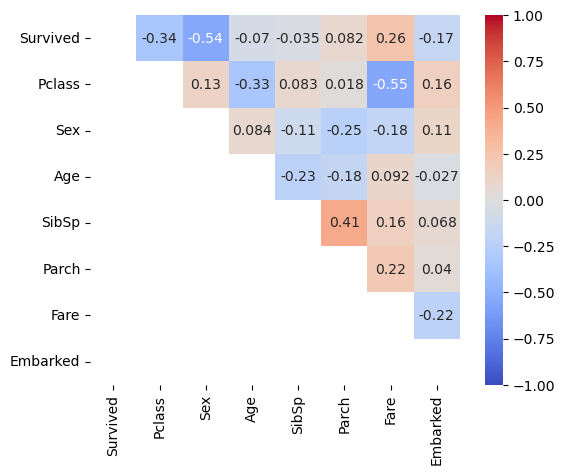

In [13]:
sb.heatmap(tsp_df.corr(),annot=True,mask=np.tril(tsp_df.corr()),square=True,cmap='coolwarm',vmin=-1,vmax=1)

From above we see that our target variable (Survived) has high correlation with Sex,Class and fare

### Pairplotting 

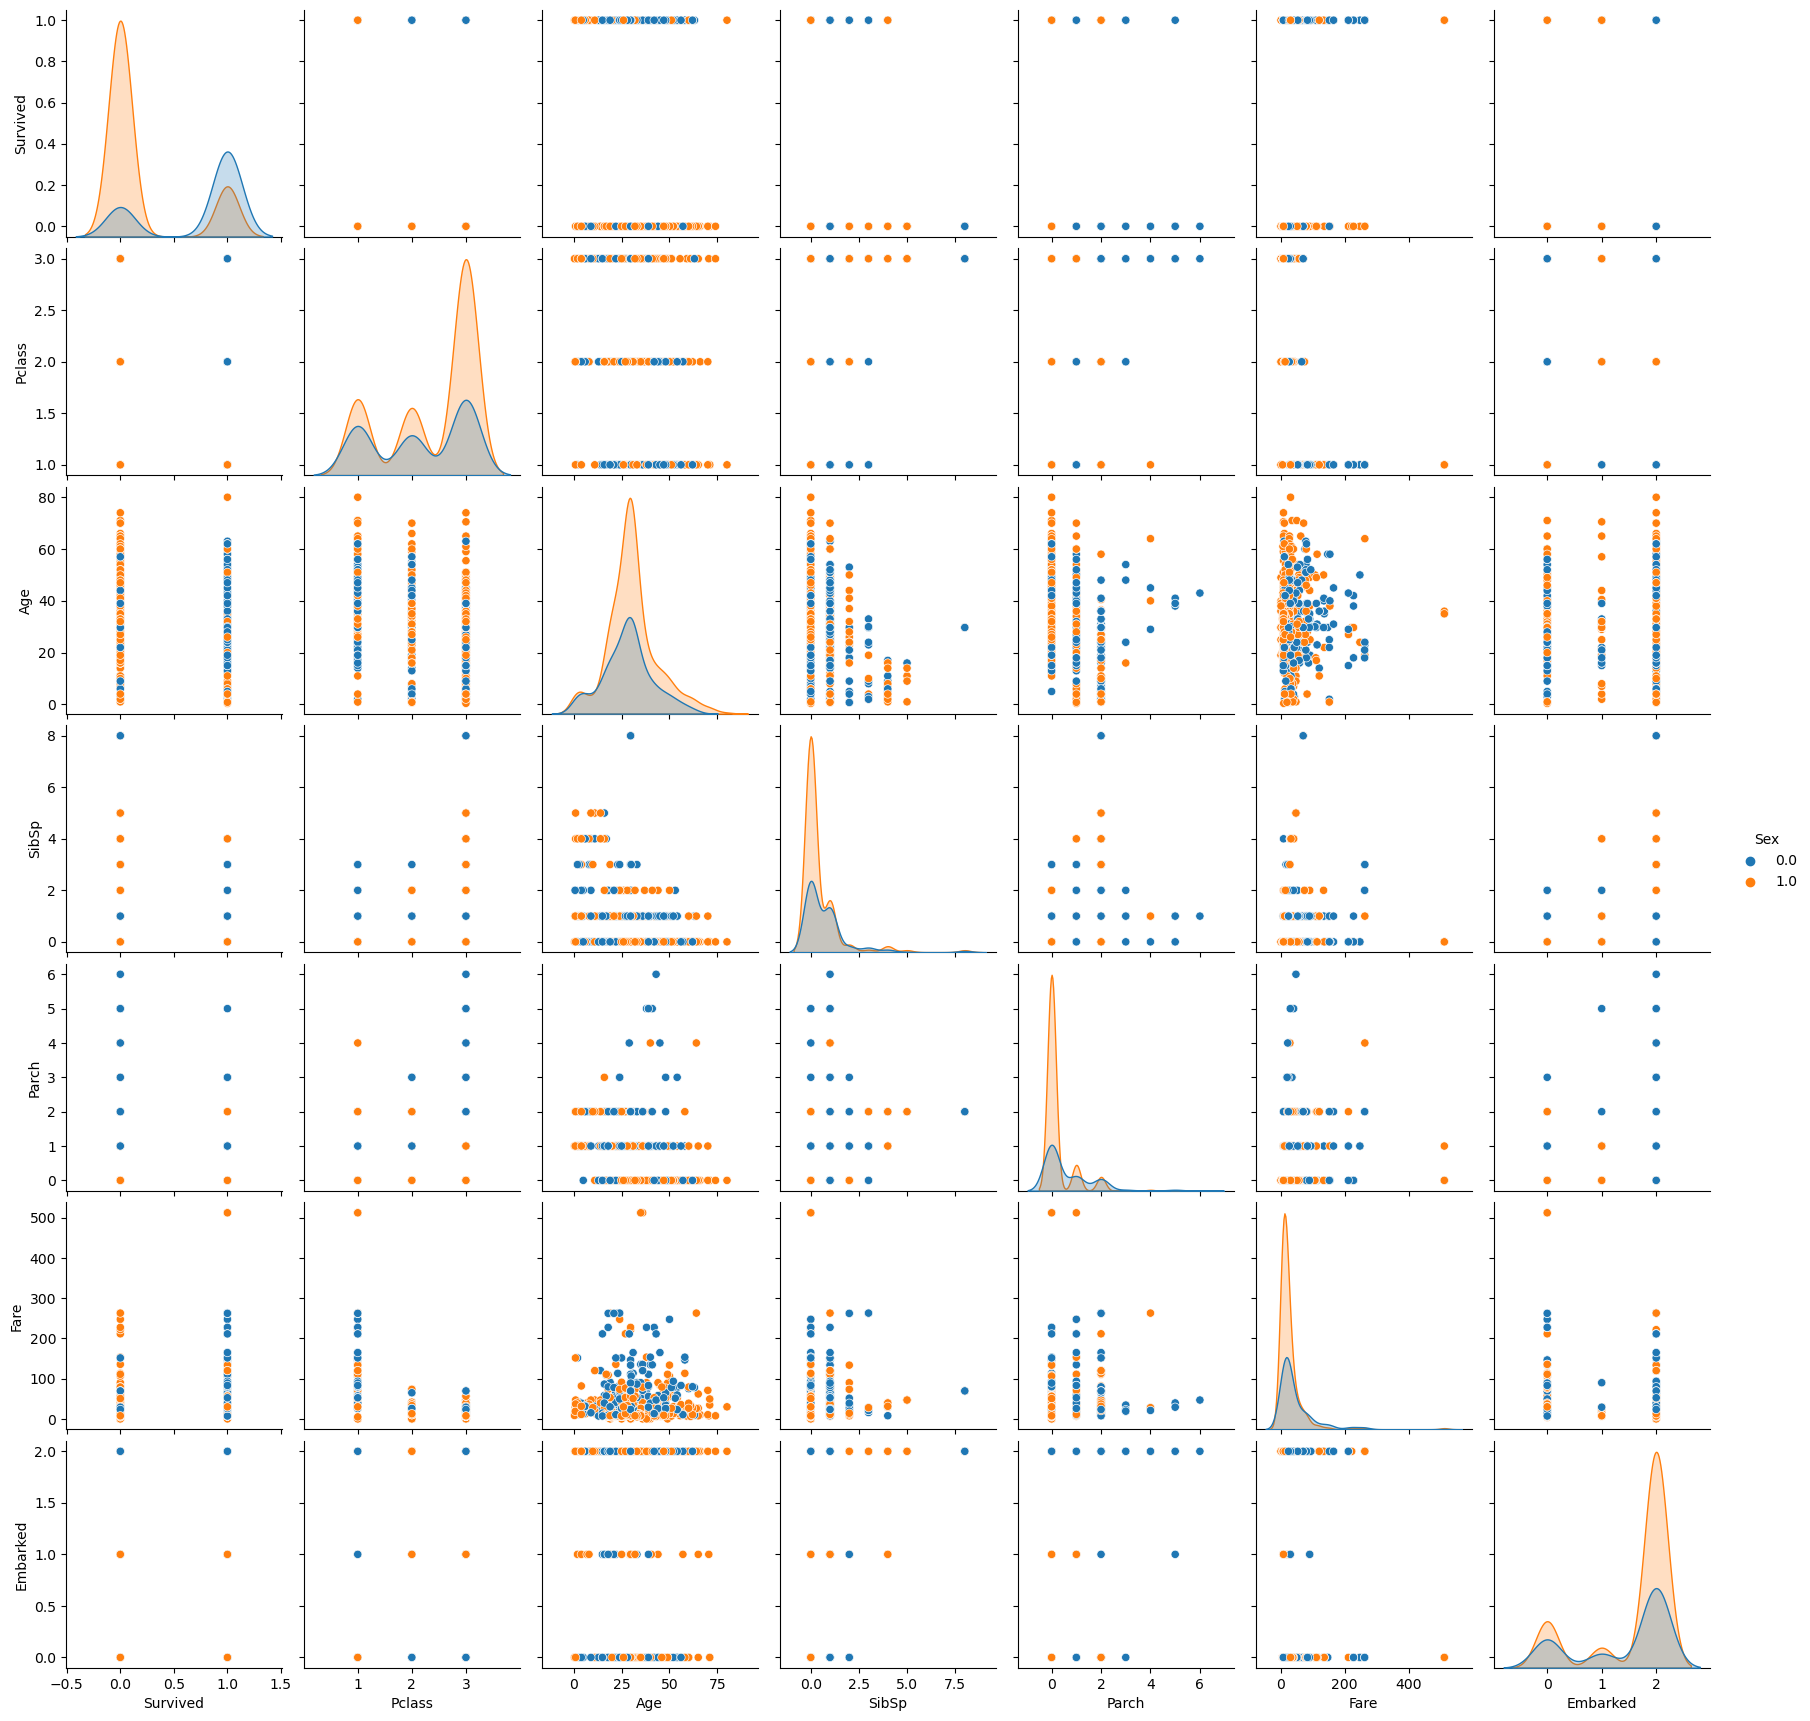

In [14]:
sb.pairplot(tsp_df,hue='Sex')

Where male = 1 (orange) and female=0 (blue) and Survived= 1 and not survived =0

### Bivariate Analysis

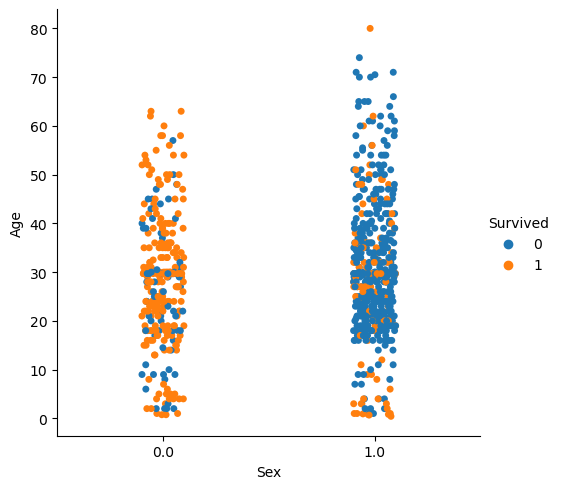

In [15]:
sb.catplot(data=tsp_df,x='Sex',y='Age',hue='Survived')

As we know that male = 1 (orange) and female=0 (blue) and Survived= 1 and not survived =0 therefore we can see that most of the people who survived were female of different age groups.

<Axes: xlabel='Pclass', ylabel='count'>

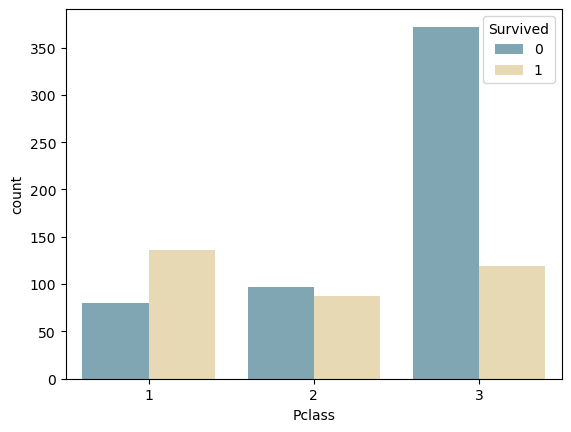

In [16]:
sb.countplot(data=tsp_df,x='Pclass',hue='Survived',palette='blend:#7AB,#EDA')

From above we see that most of the people who survived were from 1st class .

<Axes: xlabel='Age', ylabel='Density'>

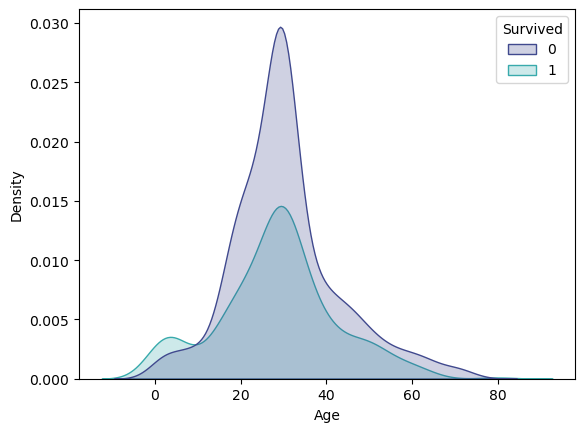

In [17]:
sb.kdeplot(data=tsp_df,x='Age',hue='Survived',palette='mako',fill=True)

From above we see that the average age of people who survived is around 30.


### Now checking for Skewness

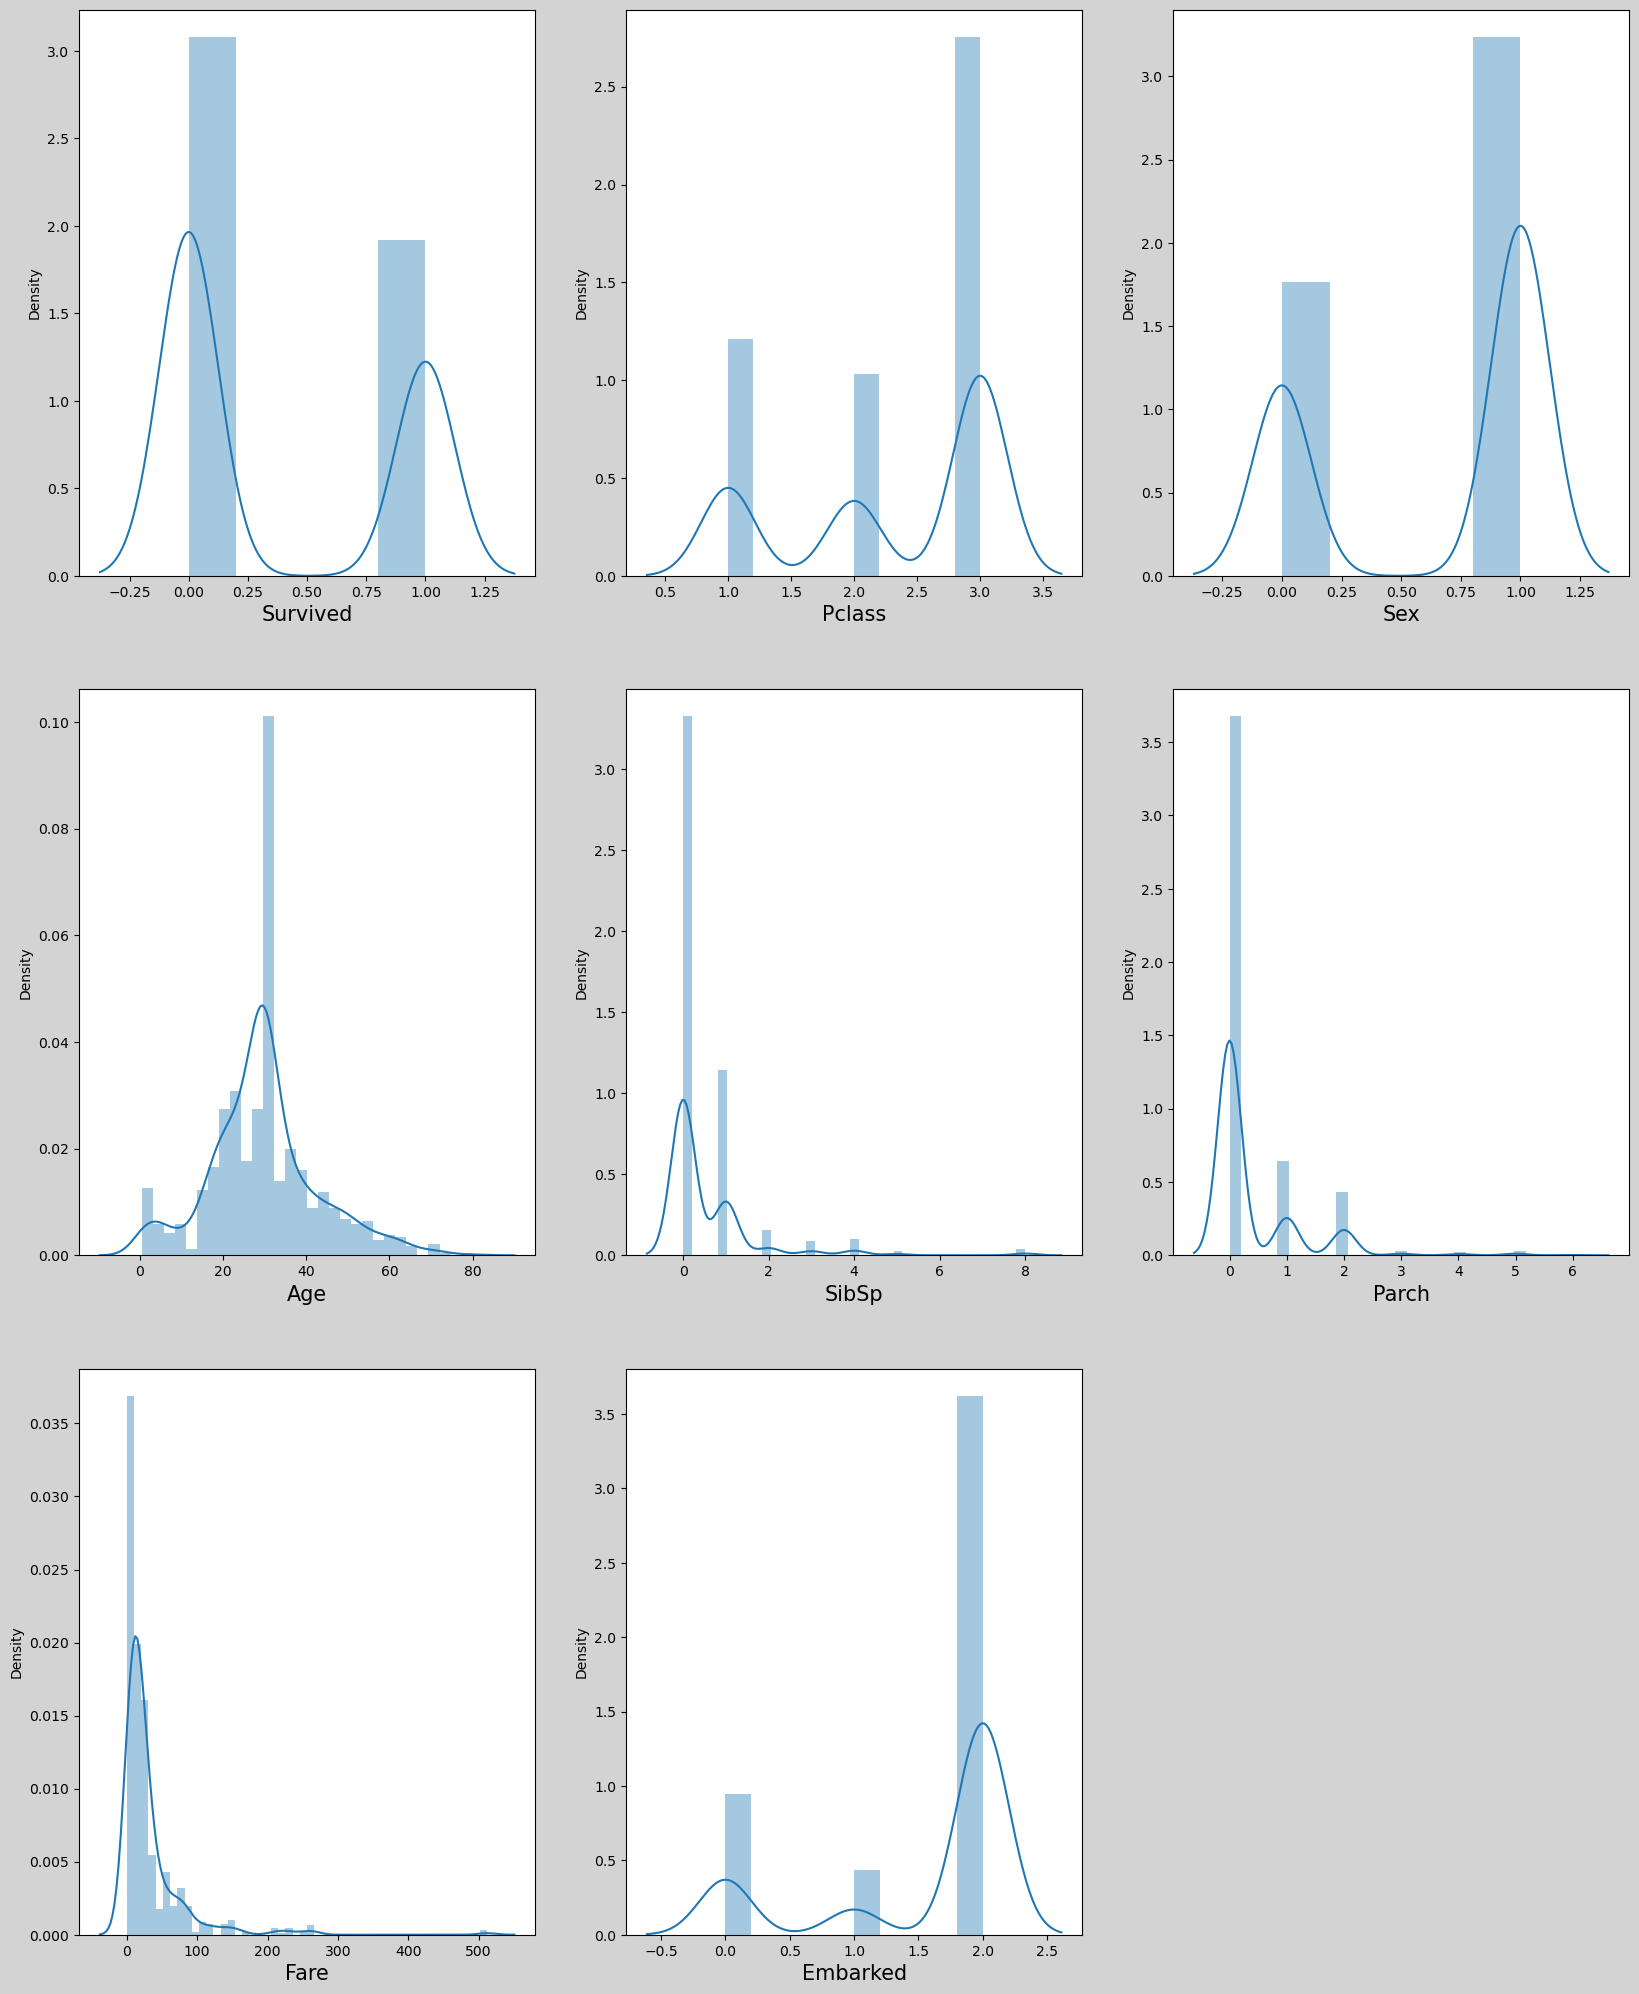

In [18]:
pt.figure(figsize=(20,25),facecolor='lightgrey')
ptno=1

for c in tsp_df:
    if ptno<=12:
        ax=pt.subplot(3,3,ptno)
        sb.distplot(tsp_df[c])
        pt.xlabel(c,fontsize=15)
        
    ptno+=1

In [19]:
tsp_df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

We can see there is some skewness in fare, Sibsp and parch but we can ignore the sknewness in categorical columns so we will remove the skewness from Fare column only.

In [20]:
tsp_df['Fare']=np.cbrt(tsp_df['Fare'])

In [21]:
tsp_df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.230382
Embarked   -1.264823
dtype: float64

SKewness is removed now

### Checking for Outliers now

Survived       Axes(0.125,0.653529;0.227941x0.226471)
Pclass      Axes(0.398529,0.653529;0.227941x0.226471)
Sex         Axes(0.672059,0.653529;0.227941x0.226471)
Age            Axes(0.125,0.381765;0.227941x0.226471)
SibSp       Axes(0.398529,0.381765;0.227941x0.226471)
Parch       Axes(0.672059,0.381765;0.227941x0.226471)
Fare               Axes(0.125,0.11;0.227941x0.226471)
Embarked        Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

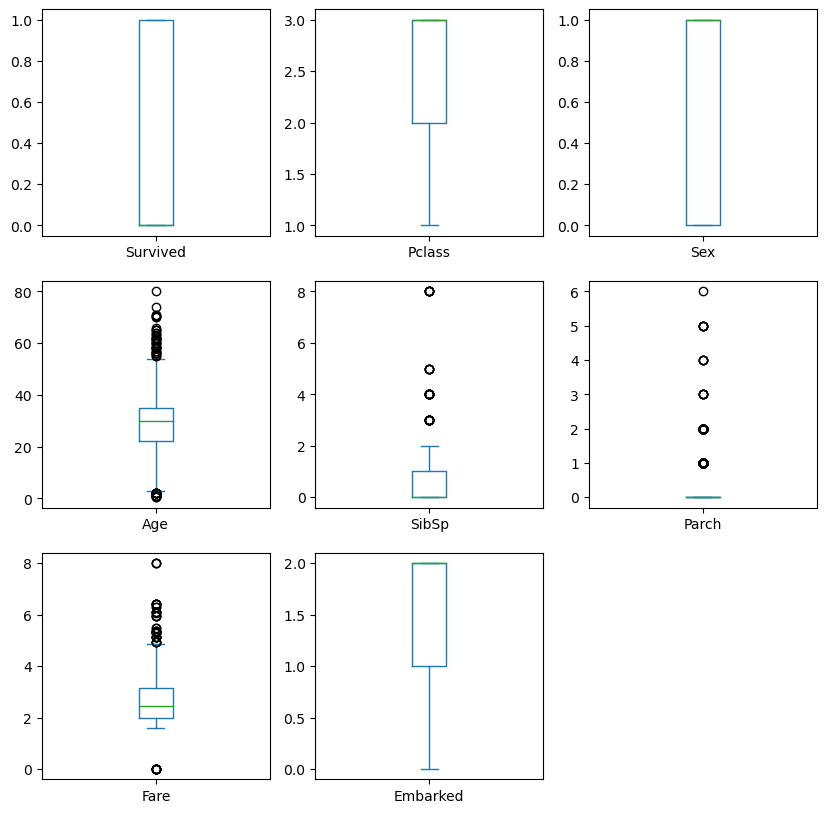

In [22]:
tsp_df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

Now we will remove outliers from the data

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(tsp_df))
threshold=3
print(np.where(z>3))
tsp_df1=tsp_df[(z<3).all(axis=1)]
tsp_df1

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 380, 386, 437, 438, 438, 480, 493, 527,
       541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686, 700,
       716, 736, 737, 742, 745, 774, 787, 792, 813, 824, 846, 850, 851,
       858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5, 5,
       3, 5, 3, 5, 6, 4, 4, 6, 6, 5, 6, 6, 3, 5, 4, 4, 4, 4, 4, 4, 3, 5,
       4, 5], dtype=int64))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,1.935438,2.0
1,1,1,0.0,38.000000,1,0,4.146318,0.0
2,1,3,0.0,26.000000,0,0,1.993730,2.0
3,1,1,0.0,35.000000,1,0,3.758647,2.0
4,0,3,1.0,35.000000,0,0,2.004158,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,2.351335,2.0
887,1,1,0.0,19.000000,0,0,3.107233,2.0
888,0,3,0.0,29.699118,1,2,2.862294,2.0
889,1,1,1.0,26.000000,0,0,3.107233,0.0


Therefore data loss= ((891-824)/891)*100= 7.5%

Which is acceptable as its below 10%

### Standardizing the data 

In [24]:
#splitting the data
f=tsp_df1.drop(['Survived'],axis=1)
l=tsp_df1['Survived']

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_f = sc.fit_transform(f)
scaled_f

array([[ 0.83863847,  0.72520751, -0.64168232, ..., -0.45501292,
        -0.76220036,  0.5831135 ],
       [-1.57336187, -1.37891568,  0.67686181, ..., -0.45501292,
         1.56247523, -1.95243016],
       [ 0.83863847, -1.37891568, -0.31204629, ..., -0.45501292,
        -0.70090797,  0.5831135 ],
       ...,
       [ 0.83863847, -1.37891568, -0.00720567, ...,  3.06546264,
         0.21236172,  0.5831135 ],
       [-1.57336187,  0.72520751, -0.31204629, ..., -0.45501292,
         0.46990714, -1.95243016],
       [ 0.83863847,  0.72520751,  0.18240776, ..., -0.45501292,
        -0.7164535 , -0.68465833]])

### Checking multicollinearity using VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = f.columns
vif['vif'] = [variance_inflation_factor(scaled_f,i) for i in range(scaled_f.shape[1])]
vif

,Features,vif
0,Pclass,2.289959
1,Sex,1.138579
2,Age,1.248978
3,SibSp,1.231226
4,Parch,1.304106
5,Fare,2.586387
6,Embarked,1.047637


We can see that every column is in the acceptable range

### Balancing the data usin SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=3)
train_x,train_y=smt.fit_resample(scaled_f,l)
train_y.value_counts()

0    501
1    501
Name: Survived, dtype: int64

Data is now balanced

### Now fitting the models

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [121]:
Model= [GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [123]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=i)
    for m in Model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.852589641434263 on Random State: 5


So the best random state is 5

In [124]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=5)

In [44]:
Model= [LogisticRegression(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:  0.796812749003984

 Confusion matrix: 
 [[ 92  23]
 [ 28 108]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       115
           1       0.82      0.79      0.81       136

    accuracy                           0.80       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.80      0.80      0.80       251



Accuracy score of RandomForestClassifier() is:  0.8605577689243028

 Confusion matrix: 
 [[102  13]
 [ 22 114]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       115
           1       0.90      0.84      0.87       136

    accuracy                           0.86       251
   macro avg       0.86      0.86      0.86       251
weighted avg       0.86      0.86      0.86       251



Accuracy score of GaussianNB() is:  0.7848605577689243

 Confusion ma

In [45]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
pred = rfc.predict(x_test)
ls=accuracy_score(y_test,pred)
lscore= cross_val_score(rfc,x_train,y_train)
lsc=lscore.mean()

lscore_selected=cross_val_score(rfc,x_train,y_train,cv=6).mean()
print("The cv score is: ", lscore_selected,"\nThe accuracy score is: ", ls)

The cv score is:  0.790962962962963 
The accuracy score is:  0.852589641434263


### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV


In [90]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}

In [125]:
final_model=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=10)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 85.65737051792829


### ROC curve

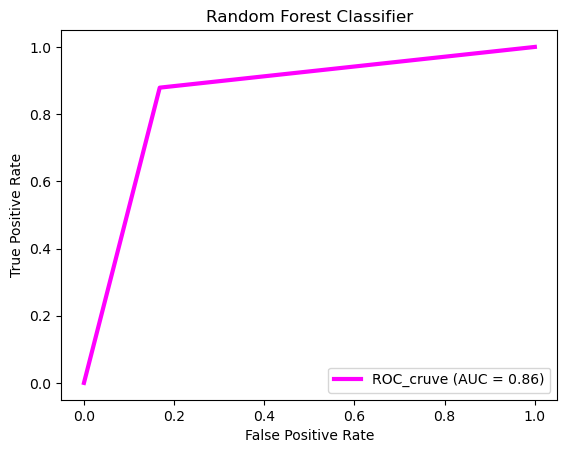

In [115]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(fmod_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=3,color='magenta')
pt.title('Random Forest Classifier')
pt.show()

### Plotting Confusion Matrix

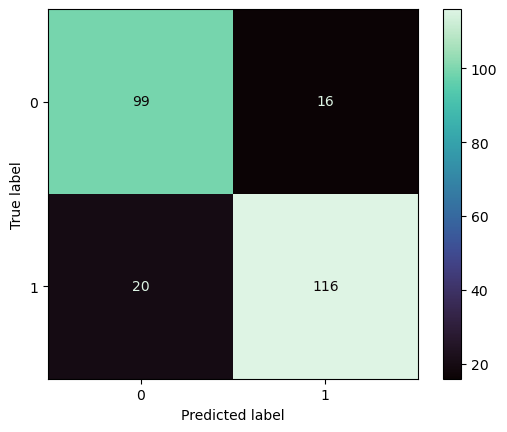

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fmod_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='mako')

### Now wewill save the model 

In [ ]:
import joblib
joblib.dump(final_model,'titanic_model.pkl')